### Data Pre-Processing

In [1]:
import pandas as pd

In [2]:
loanStats = pd.read_csv('LoanStats_2016Q4.csv', skiprows = 1)
rejectStats = pd.read_csv('RejectStats_2016Q4.csv', skiprows = 1)

C:\Users\Enqing\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(loanStats.shape)
print(loanStats.columns)

(103548, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [4]:
print(rejectStats.shape)
print(rejectStats.columns)

(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [5]:
loanStats[-3:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
103545,NaN,NaN,14000.0,14000.0,14000.0,60 months,14.49%,329.33,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
103546,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103547,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop last two rows

In [6]:
loanStats = loanStats.drop(loanStats.index[-2:])

Drop first two columns since they are empty

In [7]:
loanStats = loanStats.drop(['id', 'member_id'], axis = 1)

In [8]:
print(loanStats.shape)
print(loanStats.columns)
print(rejectStats.shape)
print(rejectStats.columns)

(103546, 142)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=142)
(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [9]:
print(loanStats['loan_amnt'].describe())
print(rejectStats['Amount Requested'].describe())

count    103546.000000
mean      14151.435835
std        9215.032376
min        1000.000000
25%        7000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    1.404490e+06
mean     1.293313e+04
std      1.567272e+04
min      0.000000e+00
25%      4.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      3.000000e+05
Name: Amount Requested, dtype: float64


In [10]:
print(loanStats['title'].value_counts())
print(rejectStats['Loan Title'].value_counts())

Debt consolidation         59749
Credit card refinancing    20528
Home improvement            7393
Other                       7383
Major purchase              2470
Medical expenses            1468
Business                    1216
Car financing               1162
Vacation                     829
Moving and relocation        772
Home buying                  475
Green loan                    97
Name: title, dtype: int64
debt_consolidation         359782
Debt consolidation         324415
other                      146389
credit_card                 96179
Other                       71882
Credit card refinancing     67381
home_improvement            44136
Home improvement            31054
car                         29480
major_purchase              29301
Car financing               22788
moving                      20836
medical                     20814
Medical expenses            19315
Business Loan               18575
Moving and relocation       17616
Major purchase              17505


There are only 9 columns in reject data, let's try to match loan data with reject data:<br/>
* 'loan_amnt' in loanStats should match with 'Amount Requested' in rejectStats.
* 'issue_d' in loanStats is the issue date, it should be later than 'Application Date' in rejectStats, let's ignore this pair for now.
* 'title' in loanStats should match with 'Loan Title' in rejectStats. However, we need to deal with upper/lower case and space/underscore issues.
* There is no column in loanStats matches with 'Risk_Score' in rejectStats, would be very useful if there was one.
* 'dti' in loanStats matches with 'Debt-To-Income Ratio' in rejectStats.
* 'zip_code' and 'addr_state' in loanStats match with 'Zip Code' and 'State' in rejectStats respectively. Zip codes are only available in first 3 digits, and we might need to get external data for the demographics about the zip code.
* 'emp_length' in loanStats matches with 'Employment Length' in rejectStats.
* 'policy_code' in loanStats matches with 'Policy Code' in rejectStats.

In [11]:
print(loanStats['emp_length'].value_counts())
print(rejectStats['Employment Length'].value_counts())

10+ years    35981
2 years       9652
3 years       8244
< 1 year      7591
1 year        6707
5 years       6292
4 years       6249
6 years       4786
8 years       3951
9 years       3870
7 years       3346
Name: emp_length, dtype: int64
< 1 year     1022412
5 years       274322
10+ years      16782
2 years         5248
3 years         4502
1 year          4389
4 years         3314
6 years         2494
8 years         1953
7 years         1918
9 years         1586
Name: Employment Length, dtype: int64


In [12]:
print(loanStats['policy_code'].value_counts())
print(rejectStats['Policy Code'].value_counts())

1.0    103546
Name: policy_code, dtype: int64
0    1403661
2        829
Name: Policy Code, dtype: int64


However, policy code is useless since it carries different meaning in the two datasets, so we should ignore this pair of columns.<br/>
Let's now build two new dataframes, and keep their columns consistent.

In [13]:
approved = pd.DataFrame()
rejected = pd.DataFrame()

Copy values from 'loan_amnt' and 'Amount Requested' directly to the new dataframes

In [14]:
approved['amount'] = loanStats['loan_amnt']
rejected['amount'] = rejectStats['Amount Requested']

Using lambda functions to convert strings, first make all characters lower cases, and split them by space, then join them using '\_'. While joining, remove words like 'and', 'expenses', 'financing', 'loan', 'refinancing', as these words are not important in reasons for loans. To further consolidate the reasons, we merge 'housing' to 'home\_buying', 'moving' to 'moving\_relocation', 'renewable\_energy' to 'green', and 'small\_business' to 'business'.

In [15]:
stop_words = ['and', 'expenses', 'financing', 'loan', 'refinancing']
approved['reason'] = loanStats['title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
rejected['reason'] = rejectStats['Loan Title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
convert = {'house': 'home_buying', 'moving': 'moving_relocation', 'renewable_energy': 'green', 'small_business': 'business'}
rejected['reason'] = rejected['reason'].apply(lambda x: convert[x] if x in convert else x)

Copy values from 'dti' and 'Debt-To-Income Ratio', however, to identify Not-a-Number floats, we test x == x, in it's a NaN, we set it to the maximum in the dataset.

In [16]:
approved['debt_to_income'] = loanStats['dti'].apply(lambda x: max(0.0, min(x / 100, 1.0)) if x == x else 1.0)
rejected['debt_to_income'] = rejectStats['Debt-To-Income Ratio'].apply(lambda x: max(0.0, min(float(x[:-1]) / 100, 1.0)))

Keep the first 3 digits of the zip codes since the last 2 digits are masked, however, it is unnecessary to convert them to numbers.

In [17]:
approved['zip3'] = loanStats['zip_code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
rejected['zip3'] = rejectStats['Zip Code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
approved['state'] = loanStats['addr_state']
rejected['state'] = rejectStats['State']

Convert the employment length to numerical values, if it is not specified, or less than a year, we take them as 0.

In [18]:
approved['employ_length'] = loanStats['emp_length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))
rejected['employ_length'] = rejectStats['Employment Length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))

The column 'reason' is now the only nominal column, we may use function get\_dummies, drop 'other' is recommended since 'reason\_=\_other' is fuzzy, and should be expressed by 0 in all other reason columns.

In [19]:
approved = pd.concat([approved, pd.get_dummies(approved['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)
rejected = pd.concat([rejected, pd.get_dummies(rejected['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)

Add the response column to the two dataframes.

In [20]:
approved['approved'] = 1
rejected['approved'] = 0

Convert the two dataframes to numpy arrays.

In [21]:
data_pos = approved.drop(['zip3', 'state'], axis = 1).values
data_neg = rejected.drop(['zip3', 'state'], axis = 1).values

In [22]:
print(data_pos.shape)
print(data_neg.shape)

(103546, 15)
(1404490, 15)


#### Imbalanced Dataset

From the values shown above, it can be seen that the dataset is imbalanced, where only about 6.87% of the data are in the positive class. 

### Build Logistic Regression Models and Naive Bayes Models

#### Split and Scale Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#combine both approved and rejected data
data = np.concatenate((data_pos, data_neg), axis=0)

#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], stratify=data[:,-1], random_state=88)

# scale loan amount and employment length
mms = MinMaxScaler()
X_train[:,[0,2]] = mms.fit_transform(X_train[:,[0,2]])
X_test[:,[0,2]] = mms.transform(X_test[:,[0,2]])

#### Selecting parameter C for Logistic Regression Classifier

To select a suitable parameter C value for Logistic Regression model, the change in training and test error is visualised with the change in parameter C. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i - 6)    
# to store inverse log likelihood per sample
logloss_train = [0] * num_C
logloss_test = [0] * num_C

# compute inverse log likelihood per sample for each C value
for i in range(num_C):
    logregr = LogisticRegression(C=C[i])
    logregr.fit(X_train, y_train)
    
    # compute log-loss on training data 
    log_proba_train = logregr.predict_proba(X_train)
    logloss_train[i] = log_loss(y_train,log_proba_train)
        
    # compute log-loss on test data 
    log_proba_test = logregr.predict_proba(X_test) 
    logloss_test[i] = log_loss(y_test,log_proba_test)


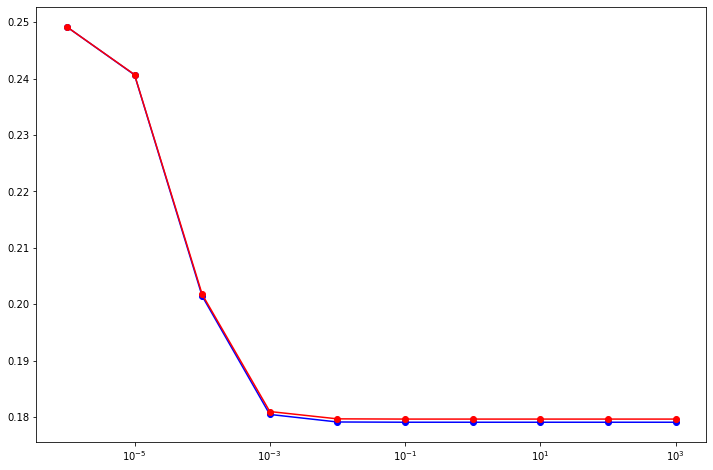

In [25]:
plt.figure(figsize = (12, 8))
plt.xscale('log')
plt.plot(C, logloss_train, 'bo-', C, logloss_test, 'ro-')
plt.show()

Based on the plot above, we would choose C=0.001 as the log-loss for both training and test are low and the difference in log loss between the training and test is minimal which would be an indication of appropriate fit. 

#### Decision Threshold:

Conventionally, decision threshold is selected to be 0.5 by default. However, threshold-moving will be performed to account for the imbalanced data by chosing the decision threshold where F-beta score is maximised.

#### Choice of beta value:

In this problem, positive class would represent the loans which have been approved. For loans, it would be better to minimise false positives to reduce risk of default and thus cost impact to the lending club. As such, precision would be important as the cost of false positive is high. 

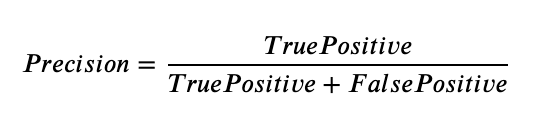

F-beta allows a balance between precision and recall. 
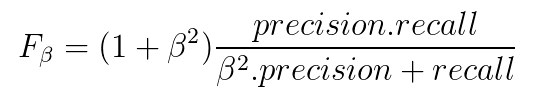

Since precision is more critical for this problem, a beta value of 0.5 is selected to give higher weightage to precision, thus focusing more on minimising false positives than minimising false negatives.  

#### Develop Logistic Regression Classifier

--------------------------------------------------
LogisticRegression(C=0.001)
--------------------------------------------------
Select threshold of 0.2 to maximise F-beta score
Precision: 0.68
Recall: 0.48
Chosen beta: 0.5
F-beta: 0.63
AUC under ROC: 0.73



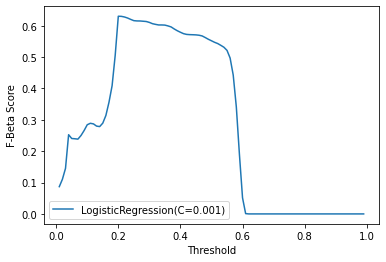

In [26]:
# develop Logistic Regression Model

from sklearn.metrics import precision_score, recall_score, fbeta_score, roc_auc_score

# create list of possible threshold values
threshold = [round(0.01*i,2) for i in range(1,100)]

# choose beta = 0.5 so as to give higher weightage to precision
beta = 0.5

model = LogisticRegression(C=0.001)

# fit and predict probability 
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)
# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta, label=model)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')
plt.legend(loc="lower left")
# compute predicted classes base on selected threshold
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)

# print results
print("-"*50)
print(f"{model}")
print("-"*50)
print(f"Select threshold of {thresholdSelected} to maximise F-beta score")
# compute scores for threshold selected
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}\n")

#### Develop Naive Bayes Classifier

As the data has both continuous and discrete data, a Gaussian Naive Bayes model would be fitted on the continuous features to generate a probability for each class. For binary features, a Bernoulli Naive Bayes model is used to generate a probability for each class. Since features are assumed to be independent in Naive Bayes model, we would use another Gaussian Naive Bayes model to fit on the predicted probabilities from the above 2 models to compute the overall probabilities for each class. 

--------------------------------------------------
Naive Bayes
--------------------------------------------------
Select threshold of 0.66 to maximise F-beta score
Precision: 0.68
Recall: 0.48
Chosen beta: 0.5
F-beta: 0.63
AUC under ROC: 0.73



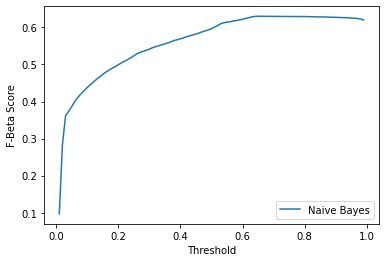

In [27]:
# develop Naive Bayes Model

from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Use GaussianNB for continuous features
gnb = GaussianNB()
gnb.fit(X_train[:,:3], y_train)
y_pred_proba_gnb_train = gnb.predict_proba(X_train[:,:3])

# Use BernoulliNB for binary features
bnb = BernoulliNB()
bnb.fit(X_train[:,3:], y_train)
y_pred_proba_bnb_train = bnb.predict_proba(X_train[:,3:])

# Use GaussianNB to predict from the output of both gnb and bnb
comb = GaussianNB()
# drop first column from each predict_proba output as both columns will be perfectly collinear
y_pred_proba_train = np.hstack((y_pred_proba_gnb_train[:,1].reshape(-1,1), y_pred_proba_bnb_train[:,1].reshape(-1,1)))
comb.fit(y_pred_proba_train, y_train)

y_pred_proba_gnb_test = gnb.predict_proba(X_test[:,:3])
y_pred_proba_bnb_test = bnb.predict_proba(X_test[:,3:])
y_pred_proba_test = np.hstack((y_pred_proba_gnb_test[:,1].reshape(-1,1), y_pred_proba_bnb_test[:,1].reshape(-1,1)))
y_pred_proba = comb.predict_proba(y_pred_proba_test)                             

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)
# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta, label="Naive Bayes")
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')
plt.legend(loc="lower right")
# compute predicted classes base on selected threshold
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)

# print results
print("-"*50)
print(f"Naive Bayes")
print("-"*50)
print(f"Select threshold of {thresholdSelected} to maximise F-beta score")
# compute scores for threshold selected
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}\n")

#### Comparison of Logistic Regression and Naive Bayes Classifiers

Logistic Regression is a discriminative model where the conditional probability of the target given the features are estimated directly from the data.

Naive Bayes model is a generative model where joint distribution is first estimated from the data and conditional probability of the target given the features is computed subsequently.

Despite both models using different approaches in making classification, Logistic Regression and Naive Bayes classifiers are able to achieve comparable results. This is also due to the optimising of decision threshold for each model to account for the imbalanced data in this problem. 

### Build Classification Models over GMM

--------------------------------------------------
LogisticRegression(C=0.001) with 5 clusters
--------------------------------------------------
Select threshold of 0.3 to maximise F-beta score
Precision: 0.71
Recall: 0.36
Chosen beta: 0.5
F-beta: 0.59
AUC under ROC: 0.67

--------------------------------------------------
Naive Bayes with 5 clusters
--------------------------------------------------
Select threshold of 0.24 to maximise F-beta score
Precision: 0.68
Recall: 0.55
Chosen beta: 0.5
F-beta: 0.65
AUC under ROC: 0.77

--------------------------------------------------
LogisticRegression(C=0.001) with 10 clusters
--------------------------------------------------
Select threshold of 0.3 to maximise F-beta score
Precision: 0.71
Recall: 0.36
Chosen beta: 0.5
F-beta: 0.59
AUC under ROC: 0.67

--------------------------------------------------
Naive Bayes with 10 clusters
--------------------------------------------------
Select threshold of 0.24 to maximise F-beta score
Precisio

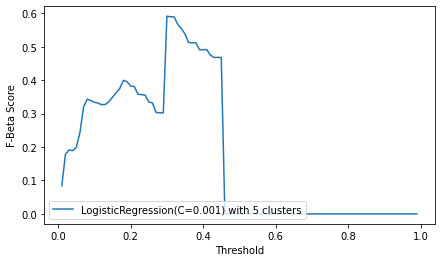

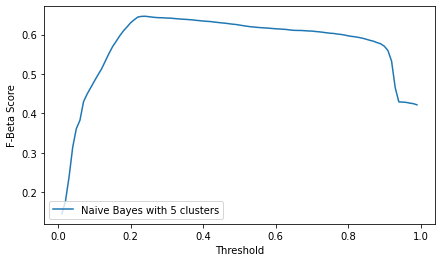

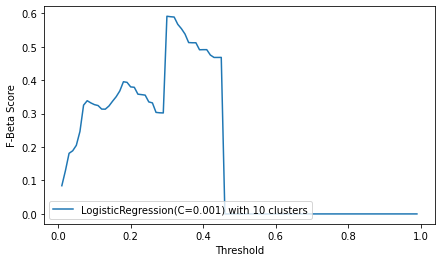

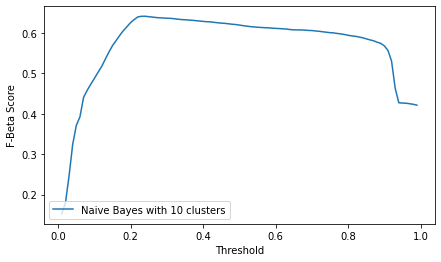

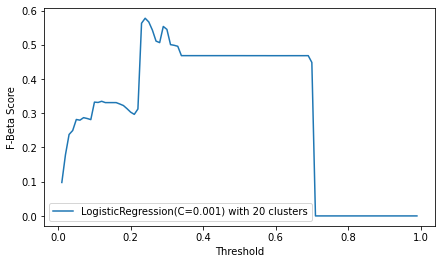

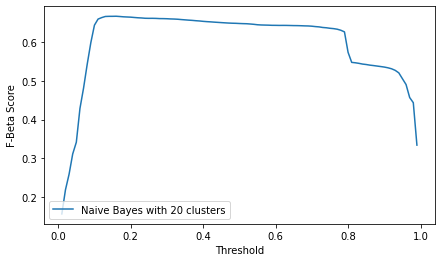

In [28]:
from sklearn.mixture import GaussianMixture

# create list of cluster models
clusters = [5,10,20]
gmm = [GaussianMixture(n_components=i) for i in clusters]

# perform clustering on data
for i in range(len(clusters)):
    gmm[i].fit(X_train)
    y_train_pred = gmm[i].predict_proba(X_train)
    y_test_pred = gmm[i].predict_proba(X_test)
    
    # threshold to select training data for each cluster
    avg = 1/clusters[i]
    
    #add cluster probability to features
    X_train_cl = np.column_stack((X_train,y_train_pred))
    X_test_cl = np.column_stack((X_test,y_test_pred))
    
    #to store predicted probability of class for each cluster
    y_pred_compiled = []
    
    #train logistic regression model for each cluster
    for j in range(clusters[i],0,-1):
        # select samples which have above average probability of being in specified cluster
        X_train_temp_cl = X_train_cl[np.where(X_train_cl[:,-j]>avg)][:,:-clusters[i]]
        y_train_temp_cl = y_train[np.where(X_train_cl[:,-j]>avg)]
        # train logistic regression model on selected samples for specified cluster
        model = LogisticRegression(C=0.001)
        model.fit(X_train_temp_cl,y_train_temp_cl)
        # use model to predict class probability on test set as if clustered to specified cluster
        y_pred_temp_clu = model.predict_proba(X_test)
        y_pred_compiled.append(list(y_pred_temp_clu[:,1]))
    #sum up the multiplication of class probability distribution and posterior probability distribution over all clusters    
    y_pred_compiled = np.transpose(np.array(y_pred_compiled))
    y_pred_proba = np.sum(np.multiply(y_test_pred,y_pred_compiled),axis=1)
    
    # compute F-beta score as threshold varies
    fbeta = []
    for k in threshold:
        y_pred = np.where(y_pred_proba>k, 1, 0)
        score = fbeta_score(y_test,y_pred,beta=beta)
        if k==threshold[0]:
            thresholdSelected = k
        elif score>max(fbeta):
            thresholdSelected = k
        fbeta.append(score)
    plt.figure(figsize = (7, 4))
    plt.plot(threshold,fbeta, label=f"{model} with {clusters[i]} clusters")
    plt.ylabel('F-Beta Score')
    plt.xlabel('Threshold')
    plt.legend(loc="lower left")
    y_pred = np.where(y_pred_proba>thresholdSelected, 1, 0)

    # print results
    print("-"*50)
    print(f"{model} with {clusters[i]} clusters")
    print("-"*50)
    print(f"Select threshold of {thresholdSelected} to maximise F-beta score")
    # compute scores for threshold selected
    print(f"Precision: {precision_score(y_test,y_pred):.2f}")
    print(f"Recall: {recall_score(y_test,y_pred):.2f}")
    print(f"Chosen beta: {beta}")
    print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
    print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}\n")
    
    
    
    #to store predicted probability of class for each cluster
    y_pred_compiled = []
    
    #train Naive Bayes model for each cluster
    for j in range(clusters[i],0,-1):
        # select samples which have above average probability of being in specified cluster
        X_train_temp_cl = X_train_cl[np.where(X_train_cl[:,-j]>avg)][:,:-clusters[i]]
        y_train_temp_cl = y_train[np.where(X_train_cl[:,-j]>avg)]

        # Use GaussianNB for continuous features
        gnb = GaussianNB()
        gnb.fit(X_train_temp_cl[:,:3], y_train_temp_cl)
        y_pred_proba_gnb_train = gnb.predict_proba(X_train_temp_cl[:,:3])

        # Use BernoulliNB for binary features
        bnb = BernoulliNB()
        bnb.fit(X_train_temp_cl[:,3:], y_train_temp_cl)
        y_pred_proba_bnb_train = bnb.predict_proba(X_train_temp_cl[:,3:])

        # Use GaussianNB to predict from the output of both gnb and bnb
        comb = GaussianNB()
        # drop first column from each predict_proba output as both columns will be perfectly collinear
        y_pred_proba_train = np.hstack((y_pred_proba_gnb_train[:,1].reshape(-1,1), y_pred_proba_bnb_train[:,1].reshape(-1,1)))
        comb.fit(y_pred_proba_train, y_train_temp_cl)

        y_pred_proba_gnb_test = gnb.predict_proba(X_test[:,:3])
        y_pred_proba_bnb_test = bnb.predict_proba(X_test[:,3:])
        y_pred_proba_test = np.hstack((y_pred_proba_gnb_test[:,1].reshape(-1,1), y_pred_proba_bnb_test[:,1].reshape(-1,1)))

        # use model to predict class probability on test set as if clustered to specified cluster
        y_pred_temp_clu = comb.predict_proba(y_pred_proba_test)  
        y_pred_compiled.append(list(y_pred_temp_clu[:,1]))
    
    #sum up the multiplication of class probability distribution and posterior probability distribution over all clusters    
    y_pred_compiled = np.transpose(np.array(y_pred_compiled))
    y_pred_proba = np.sum(np.multiply(y_test_pred,y_pred_compiled),axis=1)

    # compute F-beta score as threshold varies
    fbeta = []
    for k in threshold:
        y_pred = np.where(y_pred_proba>k, 1, 0)
        score = fbeta_score(y_test,y_pred,beta=beta)
        if k==threshold[0]:
            thresholdSelected = k
        elif score>max(fbeta):
            thresholdSelected = k
        fbeta.append(score)
    plt.figure(figsize = (7, 4))
    plt.plot(threshold,fbeta, label=f"Naive Bayes with {clusters[i]} clusters")
    plt.ylabel('F-Beta Score')
    plt.xlabel('Threshold')
    plt.legend(loc="lower left")
    y_pred = np.where(y_pred_proba>thresholdSelected, 1, 0)

    # print results
    print("-"*50)
    print(f"Naive Bayes with {clusters[i]} clusters")
    print("-"*50)
    print(f"Select threshold of {thresholdSelected} to maximise F-beta score")
    # compute scores for threshold selected
    print(f"Precision: {precision_score(y_test,y_pred):.2f}")
    print(f"Recall: {recall_score(y_test,y_pred):.2f}")
    print(f"Chosen beta: {beta}")
    print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
    print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}\n")
    

#### Evaluation of Clustering before applying Logistic Regression 

For Logistic Regression model, the F-beta score decreased regardless of the number of clusters as compared to without clustering in Question 1. Even though the precision increased when there were 5 or 10 clusters, the recall decreased which reduced the F-beta score. The AUC under ROC decreased for 5 and 10 clusters while it was comparable for 20 clusters when compared to without clustering. Overall, there is no significant improvement in results for Logistic Regression when clustering is performed first.  

When clustering is performed, samples are grouped together according to their similarities. This facilitates knowledge discovery, where patterns in data can be discovered. As Logistic Regression is a discriminative model, where the conditional probability of the target given the features are estimated directly from the data, the patterns could have been discovered by the Logistic Regression classifier and the information gained from clustering did not add significant value.   

#### Evaluation of Clustering before applying Naive Bayes Classifiers
For Naive Bayes model, the F-beta score and AUC under ROC increased when clustering was performed first as compared to without clustering in Question 1. In fact, the results from the 20 cluster model showed the most improvement, with F-beta score increasing from 0.63 to 0.67 and AUC increasing from 0.73 to 0.81 as compared to without clustering in Question 1. 

For Naive Bayes model, it assumes that all features are independent, which might not be completely valid. When clustering is performed, samples are grouped together according to their similarities. When using Naive Bayes model on each cluster, the assumption that the features are independent would be stronger given that the samples have high similarity. As such, this could contribute to the improvement in results.  